# **Prediction and Classification of cardiac Arrhythmia**

Arrhythmia is representative type of cardiovascular disease(CVD) that refers to any irregular change from the normal heart rhythms.
Although single arrhythmia heartbeat may not have a serious impact on life, continuous arrhythmia beats can result in fatal circumstances.
Thus, it is important to periodically monitor the heart rhythms to manage and prevent the CVDs.
Electrocardiogram(ECG) s a non-invasive medical tool that displays he rhythm and status of the heart.

# **Install Required Files for Starting Image Processing**


In [1]:
!unrar x "mit-bih.rar"
!unrar x "data.rar"
!pip install keras
!pip install wfdb
!pip install numpy
!pip install pandas
!pip install scipy
!pip install biosppy
!pip install opencv-python
!pip install glob2


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from mit-bih.rar

Creating    mit-bih                                                   OK
Extracting  mit-bih/100.atr                                                0%  OK 
Extracting  mit-bih/100.dat                                                0%  1%  OK 
Extracting  mit-bih/100.hea                                                1%  OK 
Extracting  mit-bih/100.xws                                                1%  OK 
Extracting  mit-bih/101.atr                                                1%  OK 
Extracting  mit-bih/101.dat                                                2%  3%  OK 
Extracting  mit-bih/101.hea                                                3%  OK 
Extracting  mit-bih/101.xws                                                3%  OK 
Extracting  mit-bih/102.atr                                              

# **Importing All Necessary Libraries**

In [0]:
import os
import wfdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
from biosppy.signals import ecg
from glob import glob
import biosppy
import cv2

# **Glob for importing all the required files from dataset**

In [0]:
paths = glob('mit-bih/*.atr')
paths = [path[:-4] for path in paths]
paths.sort()

# **Extracting all the beats and Saving in the List**

In [0]:
realbeats = ['N','L','R','B','A','a','J','S','V','r',
             'F','e','j','n','E','/','f','Q','?']

Normal = [] #Normal beat 75016
L = [] #Left bundle branch block beat 8072
R = [] #Right bundle branch block beat 7256
P = [] #Paced beat 7024
V = [] #Premature ventricular contraction 7130



a = [] #Aberrated atrial premature beat 150
J = [] #Nodal (junctional) premature beat 83
S = [] #Supraventricular premature beat 2
A = [] #Atrial premature beat 2544
F = [] #Fusion of ventricular and normal beat 803
e = [] #Atrial escape beat 16
j = [] #Nodal (junctional) escape beat 229
E = [] #Ventricular escape beat 106
f = [] #Fusion of paced and normal beat 982
Q = [] #Unclassifiable beat 33

# **Segmenting Signal Into Individual Beats (Normal, L, P, R, V)** 

In [0]:
records = paths

Normal = []
for e in records:
    signals, fields = wfdb.rdsamp(e, channels = [0]) 

    ann = wfdb.rdann(e, 'atr')
    good = ['N']
    ids = np.in1d(ann.symbol, good)
    imp_beats = ann.sample[ids]
    beats = (ann.sample)
    for i in imp_beats:
        beats = list(beats)
        j = beats.index(i)
        if(j!=0 and j!=(len(beats)-1)):
            x = beats[j-1]
            y = beats[j+1]
            diff1 = abs(x - beats[j])//2
            diff2 = abs(y - beats[j])//2
            Normal.append(signals[beats[j] - diff1: beats[j] + diff2, 0])
            

            
L = []
for e in records:
    signals, fields = wfdb.rdsamp(e, channels = [0]) 

    ann = wfdb.rdann(e, 'atr')
    good = ['L']
    ids = np.in1d(ann.symbol, good)
    imp_beats = ann.sample[ids]
    beats = (ann.sample)
    for i in imp_beats:
        beats = list(beats)
        j = beats.index(i)
        if(j!=0 and j!=(len(beats)-1)):
            x = beats[j-1]
            y = beats[j+1]
            diff1 = abs(x - beats[j])//2
            diff2 = abs(y - beats[j])//2
            L.append(signals[beats[j] - diff1: beats[j] + diff2, 0])



            
R = []
for e in records:
    signals, fields = wfdb.rdsamp(e, channels = [0]) 

    ann = wfdb.rdann(e, 'atr')
    good = ['R']
    ids = np.in1d(ann.symbol, good)
    imp_beats = ann.sample[ids]
    beats = (ann.sample)
    for i in imp_beats:
        beats = list(beats)
        j = beats.index(i)
        if(j!=0 and j!=(len(beats)-1)):
            x = beats[j-1]
            y = beats[j+1]
            diff1 = abs(x - beats[j])//2
            diff2 = abs(y - beats[j])//2
            R.append(signals[beats[j] - diff1: beats[j] + diff2, 0])
            
            
            
            
V = []
for e in records:
    signals, fields = wfdb.rdsamp(e, channels = [0]) 

    ann = wfdb.rdann(e, 'atr')
    good = ['V']
    ids = np.in1d(ann.symbol, good)
    imp_beats = ann.sample[ids]
    beats = (ann.sample)
    for i in imp_beats:
        beats = list(beats)
        j = beats.index(i)
        if(j!=0 and j!=(len(beats)-1)):
            x = beats[j-1]
            y = beats[j+1]
            diff1 = abs(x - beats[j])//2
            diff2 = abs(y - beats[j])//2
            V.append(signals[beats[j] - diff1: beats[j] + diff2, 0])
            
            
            
            
P = []
for e in records:
    signals, fields = wfdb.rdsamp(e, channels = [0]) 

    ann = wfdb.rdann(e, 'atr')
    good = ['/']
    ids = np.in1d(ann.symbol, good)
    imp_beats = ann.sample[ids]
    beats = (ann.sample)
    for i in imp_beats:
        beats = list(beats)
        j = beats.index(i)
        if(j!=0 and j!=(len(beats)-1)):
            x = beats[j-1]
            y = beats[j+1]
            diff1 = abs(x - beats[j])//2
            diff2 = abs(y - beats[j])//2
            P.append(signals[beats[j] - diff1: beats[j] + diff2, 0])
            

# **Image creation of Normal Heartbeats (Using Open-Cv and Matplotlib)**

In [0]:
kernel = np.ones((4,4),np.uint8)
count = 1

for count, i in enumerate(Normal):
    fig = plt.figure(frameon=False)
    plt.plot(i) 
    plt.xticks([]), plt.yticks([])
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    print(count)
    if(count<=7501):
      filename = 'data/test/N/N' + str(count) + '.png'
    if (count>=7502 and count<=15003):
        filename = 'data/validate/N/N' + str(count) + '.png'
    else:
        filename = 'data/train/N/N' + str(count) + '.png'    
    
    fig.savefig(filename)
    plt.close(fig)
    im_gray = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    im_gray = cv2.erode(im_gray,kernel,iterations = 1)
    im_gray = cv2.resize(im_gray, (128, 128), interpolation = cv2.INTER_LANCZOS4)
    cv2.imwrite(filename, im_gray)
    im_gray = cv2.imread(filename)
    
    image = im_gray
    
   #Left Top Crop
    crop = image[:96, :96]
    crop = cv2.resize(crop, (128, 128))
    cv2.imwrite(filename[:-4] + 'leftTop' + '.png', crop)

    #Center Top Crop
    crop = image[:96, 16:112]
    crop = cv2.resize(crop, (128, 128))
    cv2.imwrite(filename[:-4] + 'centerTop' + '.png', crop)

    #Right Top Crop
    crop = image[:96, 32:]
    crop = cv2.resize(crop, (128, 128))
    cv2.imwrite(filename[:-4] + 'rightTop' + '.png', crop)

    #Left Center Crop
    crop = image[16:112, :96]
    crop = cv2.resize(crop, (128, 128))
    cv2.imwrite(filename[:-4] + 'leftCenter' + '.png', crop)

    #Center Center Crop
    crop = image[16:112, 16:112]
    crop = cv2.resize(crop, (128, 128))
    cv2.imwrite(filename[:-4] + 'centerCenter' + '.png', crop)

    #Right Center Crop
    crop = image[16:112, 32:]
    crop = cv2.resize(crop, (128, 128))
    cv2.imwrite(filename[:-4] + 'rightCenter' + '.png', crop)

    #Left Bottom Crop
    crop = image[32:, :96]
    crop = cv2.resize(crop, (128, 128))
    cv2.imwrite(filename[:-4] + 'leftBottom' + '.png', crop)

    #Center Bottom Crop
    crop = image[32:, 16:112]
    crop = cv2.resize(crop, (128, 128))
    cv2.imwrite(filename[:-4] + 'centerBottom' + '.png', crop)

    #Right Bottom Crop
    crop = image[32:, 32:]
    crop = cv2.resize(crop, (128, 128))
    cv2.imwrite(filename[:-4] + 'rightBottom' + '.png', crop)
    

Streaming output truncated to the last 5000 lines.
2503
2504
2505
2506
2507
2508
2509
2510
2511
2512
2513
2514
2515
2516
2517
2518
2519
2520
2521
2522
2523
2524
2525
2526
2527
2528
2529
2530
2531
2532
2533
2534
2535
2536
2537
2538
2539
2540
2541
2542
2543
2544
2545
2546
2547
2548
2549
2550
2551
2552
2553
2554
2555
2556
2557
2558
2559
2560
2561
2562
2563
2564
2565
2566
2567
2568
2569
2570
2571
2572
2573
2574
2575
2576
2577
2578
2579
2580
2581
2582
2583
2584
2585
2586
2587
2588
2589
2590
2591
2592
2593
2594
2595
2596
2597
2598
2599
2600
2601
2602
2603
2604
2605
2606
2607
2608
2609
2610
2611
2612
2613
2614
2615
2616
2617
2618
2619
2620
2621
2622
2623
2624
2625
2626
2627
2628
2629
2630
2631
2632
2633
2634
2635
2636
2637
2638
2639
2640
2641
2642
2643
2644
2645
2646
2647
2648
2649
2650
2651
2652
2653
2654
2655
2656
2657
2658
2659
2660
2661
2662
2663
2664
2665
2666
2667
2668
2669
2670
2671
2672
2673
2674
2675
2676
2677
2678
2679
2680
2681
2682
2683
2684
2685
2686
2687
2688
2689
2690
2691
2692

# **Image creation of L-Type Arrhythmia Heartbeats (Using Open-Cv and Matplotlib)**

In [0]:
kernel = np.ones((4,4),np.uint8)
count = 1
for count, i in enumerate(L):
    fig = plt.figure(frameon=False)
    plt.plot(i) 
    plt.xticks([]), plt.yticks([])
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    print(count)    
    if(count<=807):
        filename = "data/test/L/L" + str(count) + '.png'
    elif (count>=808 and count<=1615):
        filename = "data/validate/L/L" + str(count) + '.png'
    else:
        filename = "data/train/L/L" + str(count) + '.png'
        
    fig.savefig(filename)
    plt.close(fig)
    im_gray = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    im_gray = cv2.erode(im_gray,kernel,iterations = 1)
    im_gray = cv2.resize(im_gray, (224, 224), interpolation = cv2.INTER_LANCZOS4)
    cv2.imwrite(filename, im_gray)
    im_gray = cv2.imread(filename)
    
    image = im_gray
    
    #Left Top Crop
    crop = image[:96, :96]
    crop = cv2.resize(crop, (224, 224))
    cv2.imwrite(filename[:-4] + 'leftTop' + '.png', crop)

    #Center Top Crop
    crop = image[:96, 16:112]
    crop = cv2.resize(crop, (224, 224))
    cv2.imwrite(filename[:-4] + 'centerTop' + '.png', crop)

    #Right Top Crop
    crop = image[:96, 32:]
    crop = cv2.resize(crop, (224, 224))
    cv2.imwrite(filename[:-4] + 'rightTop' + '.png', crop)

    #Left Center Crop
    crop = image[16:112, :96]
    crop = cv2.resize(crop, (224, 224))
    cv2.imwrite(filename[:-4] + 'leftCenter' + '.png', crop)

    #Center Center Crop
    crop = image[16:112, 16:112]
    crop = cv2.resize(crop, (224, 224))
    cv2.imwrite(filename[:-4] + 'centerCenter' + '.png', crop)

    #Right Center Crop
    crop = image[16:112, 32:]
    crop = cv2.resize(crop, (224, 224))
    cv2.imwrite(filename[:-4] + 'rightCenter' + '.png', crop)

    #Left Bottom Crop
    crop = image[32:, :96]
    crop = cv2.resize(crop, (224, 224))
    cv2.imwrite(filename[:-4] + 'leftBottom' + '.png', crop)

    #Center Bottom Crop
    crop = image[32:, 16:112]
    crop = cv2.resize(crop, (224, 224))
    cv2.imwrite(filename[:-4] + 'centerBottom' + '.png', crop)

    #Right Bottom Crop
    crop = image[32:, 32:]
    crop = cv2.resize(crop, (224, 224))
    cv2.imwrite(filename[:-4] + 'rightBottom' + '.png', crop)
    
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

# **Image creation of R-Type Arrhythmia Heartbeats (Using Open-Cv and Matplotlib)**

In [0]:
kernel = np.ones((4,4),np.uint8)
count = 1
for count, i in enumerate(R):
    fig = plt.figure(frameon=False)
    plt.plot(i) 
    plt.xticks([]), plt.yticks([])
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    print(count)
    if(count<=725):
        filename = 'data/test/R/R' + str(count) + '.png'
    elif (count>=726 and count<=1452):
        filename = 'data/validate/R/R' + str(count) + '.png'
    else:
        filename = 'data/train/R/R' + str(count) + '.png'
        
    fig.savefig(filename)
    plt.close(fig)
    im_gray = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    im_gray = cv2.erode(im_gray,kernel,iterations = 1)
    im_gray = cv2.resize(im_gray, (224, 224), interpolation = cv2.INTER_LANCZOS4)
    cv2.imwrite(filename, im_gray)
    im_gray = cv2.imread(filename)
    
    image = im_gray
    
    #Left Top Crop
    crop = image[:96, :96]
    crop = cv2.resize(crop, (224, 224))
    cv2.imwrite(filename[:-4] + 'leftTop' + '.png', crop)

    #Center Top Crop
    crop = image[:96, 16:112]
    crop = cv2.resize(crop, (224, 224))
    cv2.imwrite(filename[:-4] + 'centerTop' + '.png', crop)

    #Right Top Crop
    crop = image[:96, 32:]
    crop = cv2.resize(crop, (224, 224))
    cv2.imwrite(filename[:-4] + 'rightTop' + '.png', crop)

    #Left Center Crop
    crop = image[16:112, :96]
    crop = cv2.resize(crop, (224, 224))
    cv2.imwrite(filename[:-4] + 'leftCenter' + '.png', crop)

    #Center Center Crop
    crop = image[16:112, 16:112]
    crop = cv2.resize(crop, (224, 224))
    cv2.imwrite(filename[:-4] + 'centerCenter' + '.png', crop)

    #Right Center Crop
    crop = image[16:112, 32:]
    crop = cv2.resize(crop, (224, 224))
    cv2.imwrite(filename[:-4] + 'rightCenter' + '.png', crop)

    #Left Bottom Crop
    crop = image[32:, :96]
    crop = cv2.resize(crop, (224, 224))
    cv2.imwrite(filename[:-4] + 'leftBottom' + '.png', crop)

    #Center Bottom Crop
    crop = image[32:, 16:112]
    crop = cv2.resize(crop, (224, 224))
    cv2.imwrite(filename[:-4] + 'centerBottom' + '.png', crop)

    #Right Bottom Crop
    crop = image[32:, 32:]
    crop = cv2.resize(crop, (224, 224))
    cv2.imwrite(filename[:-4] + 'rightBottom' + '.png', crop)
    
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

# **Image creation of P-Type Arrhythmia Heartbeats (Using Open-Cv and Matplotlib)**

In [0]:
kernel = np.ones((4,4),np.uint8)
count = 1
for count, i in enumerate(P):
    fig = plt.figure(frameon=False)
    plt.plot(i) 
    plt.xticks([]), plt.yticks([])
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    print(count)    
    if(count<=702):
        filename = 'data/test/P/P' + str(count) + '.png'
    elif(count>=703 and count<=1405):
        filename = 'data/validate/P/P' + str(count) + '.png'
    else:
        filename = 'data/train/P/P' + str(count) + '.png'
        
    fig.savefig(filename)
    plt.close(fig)
    im_gray = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    im_gray = cv2.erode(im_gray,kernel,iterations = 1)
    im_gray = cv2.resize(im_gray, (224, 224), interpolation = cv2.INTER_LANCZOS4)
    cv2.imwrite(filename, im_gray)
    im_gray = cv2.imread(filename)
    
    image = im_gray
    
    #Left Top Crop
    crop = image[:96, :96]
    crop = cv2.resize(crop, (224, 224))
    cv2.imwrite(filename[:-4] + 'leftTop' + '.png', crop)

    #Center Top Crop
    crop = image[:96, 16:112]
    crop = cv2.resize(crop, (224, 224))
    cv2.imwrite(filename[:-4] + 'centerTop' + '.png', crop)

    #Right Top Crop
    crop = image[:96, 32:]
    crop = cv2.resize(crop, (224, 224))
    cv2.imwrite(filename[:-4] + 'rightTop' + '.png', crop)

    #Left Center Crop
    crop = image[16:112, :96]
    crop = cv2.resize(crop, (224, 224))
    cv2.imwrite(filename[:-4] + 'leftCenter' + '.png', crop)

    #Center Center Crop
    crop = image[16:112, 16:112]
    crop = cv2.resize(crop, (224, 224))
    cv2.imwrite(filename[:-4] + 'centerCenter' + '.png', crop)

    #Right Center Crop
    crop = image[16:112, 32:]
    crop = cv2.resize(crop, (224, 224))
    cv2.imwrite(filename[:-4] + 'rightCenter' + '.png', crop)

    #Left Bottom Crop
    crop = image[32:, :96]
    crop = cv2.resize(crop, (224, 224))
    cv2.imwrite(filename[:-4] + 'leftBottom' + '.png', crop)

    #Center Bottom Crop
    crop = image[32:, 16:112]
    crop = cv2.resize(crop, (224, 224))
    cv2.imwrite(filename[:-4] + 'centerBottom' + '.png', crop)

    #Right Bottom Crop
    crop = image[32:, 32:]
    crop = cv2.resize(crop, (224, 224))
    cv2.imwrite(filename[:-4] + 'rightBottom' + '.png', crop)
    
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

# **Image creation of V-Type Arrhythmia Heartbeats (Using Open-Cv and Matplotlib)**

In [0]:
kernel = np.ones((4,4),np.uint8)
count = 1
for count, i in enumerate(V):
    fig = plt.figure(frameon=False)
    plt.plot(i) 
    plt.xticks([]), plt.yticks([])
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    print(count)
    if(count<=713):
        filename = 'data/test/V/V' + str(count) + '.png'
    elif (count>=714 and count<=1428):
        filename = 'data/validate/V/V' + str(count) + '.png'
    else:
        filename = 'data/train/V/V' + str(count) + '.png'
        
    fig.savefig(filename)
    plt.close(fig)
    im_gray = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    im_gray = cv2.erode(im_gray,kernel,iterations = 1)
    im_gray = cv2.resize(im_gray, (224, 224), interpolation = cv2.INTER_LANCZOS4)
    cv2.imwrite(filename, im_gray)
    im_gray = cv2.imread(filename)
    
    image = im_gray
    
    #Left Top Crop
    crop = image[:96, :96]
    crop = cv2.resize(crop, (224, 224))
    cv2.imwrite(filename[:-4] + 'leftTop' + '.png', crop)

    #Center Top Crop
    crop = image[:96, 16:112]
    crop = cv2.resize(crop, (224, 224))
    cv2.imwrite(filename[:-4] + 'centerTop' + '.png', crop)

    #Right Top Crop
    crop = image[:96, 32:]
    crop = cv2.resize(crop, (224, 224))
    cv2.imwrite(filename[:-4] + 'rightTop' + '.png', crop)

    #Left Center Crop
    crop = image[16:112, :96]
    crop = cv2.resize(crop, (224, 224))
    cv2.imwrite(filename[:-4] + 'leftCenter' + '.png', crop)

    #Center Center Crop
    crop = image[16:112, 16:112]
    crop = cv2.resize(crop, (224, 224))
    cv2.imwrite(filename[:-4] + 'centerCenter' + '.png', crop)

    #Right Center Crop
    crop = image[16:112, 32:]
    crop = cv2.resize(crop, (224, 224))
    cv2.imwrite(filename[:-4] + 'rightCenter' + '.png', crop)

    #Left Bottom Crop
    crop = image[32:, :96]
    crop = cv2.resize(crop, (224, 224))
    cv2.imwrite(filename[:-4] + 'leftBottom' + '.png', crop)

    #Center Bottom Crop
    crop = image[32:, 16:112]
    crop = cv2.resize(crop, (224, 224))
    cv2.imwrite(filename[:-4] + 'centerBottom' + '.png', crop)

    #Right Bottom Crop
    crop = image[32:, 32:]
    crop = cv2.resize(crop, (224, 224))
    cv2.imwrite(filename[:-4] + 'rightBottom' + '.png', crop)
    
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

# **Importing All Libraries (Keras, Numpy, Sklearn and Matplotlib) Necessary for Training of CNN Model**

In [19]:
import numpy as np
import tensorflow
import keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import TensorBoard 
from tensorflow.keras.layers import Conv2D, MaxPool2D
#from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import datetime
import os

Using TensorFlow backend.


# **TensorBoard Helps in showing graph of each Epoch Loss and Epoch Accuracy)**

In [0]:
tensorboard = TensorBoard(log_dir = os.path.join(
    "logs",
    "fit",
    datetime.datetime.now().strftime("%Y%m%d-%H%M%S"),
))

# **Importing all the Images from our Train, Validate and Test Folder (Using ImageDataGenerator)**

In [26]:
train_path = 'data/train'
valid_path = 'data/validate'
test_path = 'data/test'

train_datagen = ImageDataGenerator(rescale=1.0/255.0, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
valid_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_batches = train_datagen.flow_from_directory(train_path, target_size=(128, 128), classes=['L','N','P','R','V'], batch_size=32, class_mode='categorical')
valid_batches = valid_datagen.flow_from_directory(valid_path, target_size=(128, 128), classes=['L','N','P','R','V'], batch_size=16, class_mode='categorical')
test_batches = test_datagen.flow_from_directory(test_path, target_size=(224, 224), classes=['A','L','N','P','R','V'], batch_size=16, shuffle=False)

Found 0 images belonging to 5 classes.
Found 0 images belonging to 5 classes.
Found 104530 images belonging to 6 classes.


# **Model Creation and It's Parameters**

In [0]:
IMAGE_SIZE = (128,128,3)
model = Sequential()

model.add(Conv2D(64, (3,3),strides = (1,1), input_shape = IMAGE_SIZE,kernel_initializer='glorot_uniform'))

model.add(tensorflow.keras.layers.ELU())

model.add(BatchNormalization())

model.add(Conv2D(64, (3,3),strides = (1,1),kernel_initializer='glorot_uniform'))

model.add(tensorflow.keras.layers.ELU())

model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2, 2), strides= (2,2)))

model.add(Conv2D(128, (3,3),strides = (1,1),kernel_initializer='glorot_uniform'))

model.add(tensorflow.keras.layers.ELU())

model.add(BatchNormalization())

model.add(Conv2D(128, (3,3),strides = (1,1),kernel_initializer='glorot_uniform'))

model.add(tensorflow.keras.layers.ELU())

model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2, 2), strides= (2,2)))

model.add(Conv2D(256, (3,3),strides = (1,1),kernel_initializer='glorot_uniform'))

model.add(tensorflow.keras.layers.ELU())

model.add(BatchNormalization())

model.add(Conv2D(256, (3,3),strides = (1,1),kernel_initializer='glorot_uniform'))

model.add(tensorflow.keras.layers.ELU())

model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2, 2), strides= (2,2)))

model.add(Flatten())

model.add(Dense(2048))

model.add(tensorflow.keras.layers.ELU())

model.add(BatchNormalization())

model.add(Dropout(0.5))

model.add(Dense(5, activation='softmax'))


# **Model Compilation (Using Adam Optimizer, and Categorical Loss) and Model Summary**

In [0]:
model.compile(Adam(lr=.00015), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 126, 126, 64)      1792      
_________________________________________________________________
elu_7 (ELU)                  (None, 126, 126, 64)      0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 126, 126, 64)      256       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 124, 124, 64)      36928     
_________________________________________________________________
elu_8 (ELU)                  (None, 124, 124, 64)      0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 124, 124, 64)      256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 62, 62, 64)       

# **Evaluating Steps Per Epoch for Training  and Validation Steps for Validation of the Images**

In [0]:
train_steps_per_epoch = np.math.ceil(train_batches.samples / train_batches.batch_size)
valid_steps_per_epoch = np.math.ceil(valid_batches.samples / valid_batches.batch_size)
print(valid_steps_per_epoch)
print(train_steps_per_epoch)

6535
26122


# **Fitting The Model**

In [0]:
from IPython.display import display
from PIL import Image
history = model.fit(train_batches, steps_per_epoch=1000, validation_data=valid_batches, callbacks = [tensorboard], validation_steps=800, epochs=25)

Epoch 1/25
2000/2000 [==============================] - 855s 428ms/step - loss: 0.8701 - accuracy: 0.7370 - val_loss: 0.9172 - val_accuracy: 0.7287
Epoch 2/25
2000/2000 [==============================] - 855s 427ms/step - loss: 0.8034 - accuracy: 0.7522 - val_loss: 0.9239 - val_accuracy: 0.7205
Epoch 3/25
2000/2000 [==============================] - 862s 431ms/step - loss: 0.7630 - accuracy: 0.7674 - val_loss: 0.9189 - val_accuracy: 0.7294
Epoch 4/25
2000/2000 [==============================] - 856s 428ms/step - loss: 0.7479 - accuracy: 0.7730 - val_loss: 0.9008 - val_accuracy: 0.7332
Epoch 5/25
2000/2000 [==============================] - 856s 428ms/step - loss: 0.7385 - accuracy: 0.7753 - val_loss: 0.9125 - val_accuracy: 0.7117
Epoch 6/25
2000/2000 [==============================] - 856s 428ms/step - loss: 0.7283 - accuracy: 0.7770 - val_loss: 0.9036 - val_accuracy: 0.7118
Epoch 7/25
2000/2000 [==============================] - 861s 430ms/step - loss: 0.7163 - accuracy: 0.7816 - val_

# **Saving The Trained Model**

In [0]:
model.save('Predict_types_of_arrhythmia.h5')

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 43870, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 320, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 351, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 364, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 724, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil

# **Mounting Google Drive for Accessing Trained Model**

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# **Loading Already Trained CNN Model**

In [0]:
from tensorflow.keras.models import load_model

path_to_model = '/content/drive/My Drive/Predict_types_of_arrhythmia.h5'

model = load_model(path_to_model)

# **Evaluating Test Accuracy of Trained Model**

In [31]:
test_steps_per_epoch = np.math.ceil(test_batches.samples / test_batches.batch_size)
test_accu = model.evaluate(test_batches, steps=3800)

print('The testing accuracy is:',test_accu[1]*100, '%')

3800/3800 [==============================] - 178s 47ms/step - loss: 0.4203 - accuracy: 0.8911
The testing accuracy is: 89.11184072494507 %


# **Model Prediction**

In [0]:
test_steps_per_epoch = np.math.ceil(test_batches.samples / test_batches.batch_size)
print(test_steps_per_epoch)

predictions = model.predict(test_batches, steps=800)

# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)
print(predicted_classes)
print(len(predicted_classes))

array([[8.4379334e-03, 5.6022889e-04, 8.3858138e-01, 6.3603051e-04,
        1.5172519e-01, 5.9225371e-05],
       [2.8822336e-02, 1.7221620e-02, 8.0476153e-01, 4.8090238e-03,
        1.3880265e-01, 5.5828630e-03],
       [2.5413713e-01, 2.1427667e-02, 5.5393589e-01, 8.4377281e-02,
        7.2613820e-02, 1.3508197e-02],
       ...,
       [3.2059497e-03, 1.3767643e-01, 7.8225380e-01, 5.2247397e-03,
        6.6551201e-02, 5.0879386e-03],
       [1.0436574e-02, 6.3946061e-02, 8.0322802e-01, 2.4752242e-02,
        8.7728381e-02, 9.9087888e-03],
       [1.0436574e-02, 6.3946061e-02, 8.0322802e-01, 2.4752242e-02,
        8.7728381e-02, 9.9087888e-03]], dtype=float32)

# **Confusion Matrix**

104530
Confusion Matrix, without normalization


[[ 1233  6656     0     1   190]
 [  368 74558     0     0    94]
 [  250  6681    98     0     1]
 [   22  6649     5   273   311]
 [  352  2876   491     0  3421]]




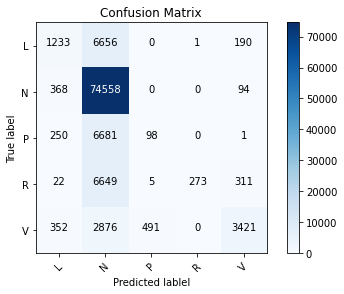

In [0]:
true_classes = test_batches.classes
class_labels = list(test_batches.class_indices.keys())   

cm = confusion_matrix(true_classes, predicted_classes)

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This functon prints and plots the confusion matrix.
    Normalization can be applied by setting 'normalize=True'.
    """
    plt.imshow(cm,interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')
    
    print(cm)
    print('\n')
    
    thresh = cm.max() / 2
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted lablel')
    
cm_plot_labels = ['L','N','P','R','V']
plot_confusion_matrix(cm, class_labels, title='Confusion Matrix')

# **Taking Single value from Location**

In [0]:
filename = "/content/Test_data/L/L0centerBottom.png"

# **Predicting Single Value Outcome**

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
image = load_img(filename, target_size=(224, 224))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image /= 255.0
pred = model.predict(image.reshape((1, 224, 224, 3)))
print(pred)
pred_class = pred.argmax(axis=1)
if(pred_class == 1):
  print('L')
elif(pred_class == 2):
  print('N')
elif(pred_class == 3):
  print('P') 
elif(pred_class== 4):
  print('R')
else:
  print('V')

[[0.0133681  0.39336854 0.3765711  0.01929563 0.02481852 0.17257814]]
L
